### <center>  Visualizing Amounts in Finance </center>    

    Most commonly used visualizations to compare amounts include:
    
    1. Bar Charts
    2. Diverging Bar Charts    
    3. Stacked Bar Charts
    4. Grouped Bar Charts (also called Clustered Bar Charts)
    5. Animated Bar Charts
    6. Dot Plots (also called Cleveland Dot Charts)
    7. Bubble Charts
    8. Heatmaps
    
    Others include :
    9.  Waterfall Charts
    10. Polar Area Charts (also called Coxcomb Charts)
    11. Dumbbell Charts


    First things first; We will be using quandl api and quantmod api to import financial data in this notebook.
    We can install quandl & quantmod packages and register an account on quandl.com
    
> ##### Create a free Quandl account and set your API key here 

    For more information, refer to :
    https://www.quandl.com/tools/r

In [12]:
# Run the script below with your secret key obtained after registering on quandl
# quandl_sk = "<quandl secret key>"

# Load Data Tokens and initial config
source("../3. Jupyter Notebooks/Setup/apitokens.r")

In [32]:
# Data manipulation libraries used in this notebook
library(tibble) # includes rownames_to_column function
library(dplyr) # includes filter function
library(tidyr) # includes spread function

# Visualization libraries used in this notebook
library(ggplot2) # Includes ggplot function
library(ggforce) # Includes geom_sina & geom_parallel_sets
library(ggridges) # Includes geom_
library(cowplot) # Includes axis_canvas for generating A Canvas Onto Which One Can Draw Axis-Like Objects

# Data API libraries
library(Quandl) # To import data from Quandl API
library(quantmod) # To import data using yahoo,google api

# Animation Packages
library(gganimate) # to add animation to static plot 
library(gifski) # Converts images to GIF animations
library(png) # Provides an easy and simple way to read, write and display bitmap images stored in the PNG format.

# Datetime Parsing functions
library(lubridate) # includes datetime parsing functions

# Data visualization addon library for Themes and colors available in my github repository
# https://github.com/prabhupavitra/dviz.addon
library(dviz.addon)

In [14]:
# Resizing plot width and height from default 7
# https://www.rdocumentation.org/packages/repr/versions/0.7/topics/repr-options
options(repr.plot.width=10, repr.plot.height=4)

> ### Importing Data (Using Quandl and quantmod API)

    This notebook uses Quandl and quantmod API to import Financial Data directly to R.
    Datasets used in this notebook include:
    
    1. Historical Prices of Precious Metals 
        (Gold, Silver, Platinum and Palladium)
    2. Historical Prices of Base Metals 
        (Aluminum; Cobalt; Copper; Iron Ore; Lead; Molybdenum; Nickel; Tin; Uranium and Zinc)
    3. Consumer Price Index for All Urban Consumers (CPI-U)

> ##### Precious Metals Prices : London Fixing (U.S. Dollars per Troy Ounce)

In [18]:
# Using Quandl API : Import prices of Precious Metals ( Gold, Silver, Platinum, Palladium )

# Gold Price: London Fixing
gold <- Quandl("LBMA/GOLD", api_key=quandl_sk)

# Silver Price: London Fixing
silver <- Quandl("LBMA/SILVER", api_key=quandl_sk)

# Platinum Fixing
platinum <- Quandl("LPPM/PLAT", api_key=quandl_sk)

# Palladium
palladium <- Quandl("LPPM/PALL", api_key=quandl_sk)

> ##### Base Metals Prices : Spot Prices (U.S. Dollars per metric ton)

In [17]:
# Other Base Metals (Aluminum; Cobalt; Copper; Iron Ore; Lead; Molybdenum; Nickel; Tin; Uranium and Zinc)

# Aluminum; 99.5% minimum purity; LME spot price; CIF UK ports; US$ per metric ton
aluminium <- Quandl("ODA/PALUM_USD", api_key=quandl_sk)

# Copper; grade A cathode; LME spot price; CIF European ports; US$ per metric ton
copper <- Quandl("ODA/PCOPP_USD", api_key=quandl_sk)

# China import Iron Ore Fines 62% FE spot (CFR Tianjin port); US dollars per metric ton
ironore <- Quandl("ODA/PIORECR_USD", api_key=quandl_sk)

# Lead; 99.97% pure; LME spot price; CIF European Ports; US$ per metric ton
lead <- Quandl("ODA/PLEAD_USD", api_key=quandl_sk)

# Nickel; melting grade; LME spot price; CIF European ports; US$ per metric ton
nickel <- Quandl("ODA/PNICK_USD", api_key=quandl_sk)

# Tin; standard grade; LME spot price; US$ per metric ton
tin <- Quandl("ODA/PTIN_USD", api_key=quandl_sk)

# Zinc; high grade 98% pure; US$ per metric ton
zinc <- Quandl("ODA/PZINC_USD", api_key=quandl_sk)

# Not in metric ton

# Cobalt; U.S. cathodes; spot
cobalt <- Quandl("ODA/PCOBA_USD", api_key=quandl_sk) 

# Uranium; NUEXCO; Restricted Price; Nuexco exchange spot; US$ per pound
uranium <- Quandl("ODA/PURAN_USD", api_key=quandl_sk)

# Molybdenum; 57 to 63% purity contained in roasted molybdenum concentrate; LME spot price; USD/ton
molybdenum <- Quandl("ODA/PLMMODY_USD", api_key=quandl_sk)

> ##### CPI Data : CPI for U.S. City Average

    Units:
    Index 1982-1984=100,
    Seasonally Adjusted
    
    Frequency:
    Monthly

In [16]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average 
monthly_allitems <- Quandl("FRED/CPIAUCSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average
monthly_foodbev <- Quandl("FRED/CPIFABSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average
monthly_excfoodnbev <- Quandl("FRED/CPILFESL", api_key=quandl_sk)  

# Consumer Price Index for All Urban Consumers: Recreation in U.S. City Average
monthly_recreation <- Quandl("FRED/CPIRECNS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Housing in U.S. City Average 
monthly_housing <- Quandl("FRED/CPIHOSNS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Education and Communication in U.S. City Average
monthly_eduncomm <- Quandl("FRED/CPIEDUSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Apparel in U.S. City Average
monthly_apparel <- Quandl("FRED/CPIAPPSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
monthly_energy <- Quandl("FRED/CPIENGSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Other Goods and Services in U.S. City Average
monthly_othergns <- Quandl("FRED/CPIOGSSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Transportation in U.S. City Average 
monthly_trnsprt <- Quandl("FRED/CPITRNSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Services in U.S. City Average 
monthly_otherserv <- Quandl("FRED/CUSR0000SAS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Commodities in U.S. City Average
monthly_commod <- Quandl("FRED/CUSR0000SAC", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average
monthly_medcare <- Quandl("FRED/CPIMEDSL", api_key=quandl_sk) 

> ### Data Manipulation
> ##### Precious Metals Prices : London Fixing (U.S. Dollars per Troy Ounce)

In [19]:
# Merging the datasets of all 4 precious metals (Measured per Troy Ounce)
precious_metals <- 
rbind(gold %>% select("Date","USD (AM)") %>% rename(USD="USD (AM)") %>% mutate(Commodity="Gold"),
silver %>% select("Date","USD") %>% mutate(Commodity="Silver"),
platinum %>% select("Date","USD AM") %>% rename(USD="USD AM") %>% mutate(Commodity="Platinum"),
palladium %>% select("Date","USD AM") %>% rename(USD="USD AM") %>% mutate(Commodity="Palladium")) %>%
mutate(Year = year(Date)) %>% filter(USD!="NA")

head(precious_metals,5)

Date       USD     Commodity Year
1 2020-03-10 1657.40 Gold      2020
2 2020-03-09 1676.60 Gold      2020
3 2020-03-06 1687.00 Gold      2020
4 2020-03-05 1647.45 Gold      2020
5 2020-03-04 1644.80 Gold      2020

> ##### Base Metals Prices : Spot Prices (U.S. Dollars per metric ton)

In [20]:
base_metals <-
rbind(aluminium %>% mutate(Commodity="Aluminium"),
      copper %>% mutate(Commodity="Copper"),
      ironore %>% mutate(Commodity="Iron Ore"),
      lead %>% mutate(Commodity="Lead"),
      nickel %>% mutate(Commodity="Nickel"),
      tin %>% mutate(Commodity="Tin"),
      zinc %>% mutate(Commodity="Zinc")) %>%
mutate(Year = year(Date))

head(base_metals,1)

Date       Value    Commodity Year
1 2020-02-29 1688.095 Aluminium 2020

> ##### CPI Data : CPI for U.S. City Average

In [21]:
cpi_monthly_sa <-
rbind(monthly_allitems %>% mutate(Category="CPI"),
      monthly_excfoodnbev %>% mutate(Category="Core CPI"),
      monthly_apparel %>% mutate(Category="Apparel"),
      monthly_commod %>% mutate(Category="Commodities"),
      monthly_eduncomm %>% mutate(Category="Education & Communication"),
      monthly_energy %>% mutate(Category="Energy"),
      monthly_foodbev %>% mutate(Category="Food & Beverages"),
      monthly_housing %>% mutate(Category="Housing"),
      monthly_medcare %>% mutate(Category="Medical Care"),
      monthly_othergns %>% mutate(Category="Other Goods & Services"),
      monthly_otherserv %>% mutate(Category="Other Services"),
      monthly_recreation %>% mutate(Category="Recreation"),
      monthly_trnsprt %>% mutate(Category="Transportation")) %>%
mutate (Year =year(Date),Month=month(Date))

head(cpi_monthly_sa,1)

Date       Value  Category Year Month
1 2020-01-01 258.82 CPI      2020 1

> ##### Some basic Math Calculations with CPI

In [22]:
# Percent Change (1982-Present)
cpi_pctchng <- filter(cpi_monthly_sa,#Month==1,
                                     Year>1982,
                                     !(Category %in% c('Energy','Transport'))) %>%
               group_by(Category) %>%
               arrange(Date) %>%
               mutate(PercentChange = (Value/lag(Value)-1)*100) %>%
               filter(PercentChange!="NA") 

# Over-the-year percent change 
cpi_otypct <- 
cpi_monthly_sa %>% 
filter(Year>1982,Month==12) %>% 
arrange(Date) %>% 
group_by(Category) %>% 
mutate(OverYrPercentChange = (Value/lag(Value)-1)*100) %>%
filter(OverYrPercentChange!="NA")


# Annual Average, Annual Average CHange and Purchasing Power
cpi_annualavg <-
cpi_monthly_sa %>% filter(Year>1982,Year<2020) %>%
arrange(Date) %>%
group_by(Year,Category) %>%
summarise(AnnualAvg = mean(Value)) %>%
group_by(Category) %>%
mutate(AnnualAvgChange = (AnnualAvg/lag(AnnualAvg)-1)*100,PurchasingPower = (AnnualAvg/lag(AnnualAvg)*100)) %>%
filter(AnnualAvgChange!="NA")

> ### Visualizing Amounts

> ##### Bar Chart

    A simple way to visualize the quantitative data of a categorical variable is the bar chart. The height of
    the bar is proportional to the quantity we want to visualize. They can be used for displaying data that are 
    classified as nominal data/ordinal data.
    
    They are one of the most commonly used types of plots because they are simple to create and very easy to 
    interpret. They are also a flexible chart type and there are several variations of the standard bar chart.

    Different types of bar charts:
    - Horizontal bar charts
    - Grouped or Component charts
    - Stacked bar charts
    - Diverging bar charts
    - Animated bar charts


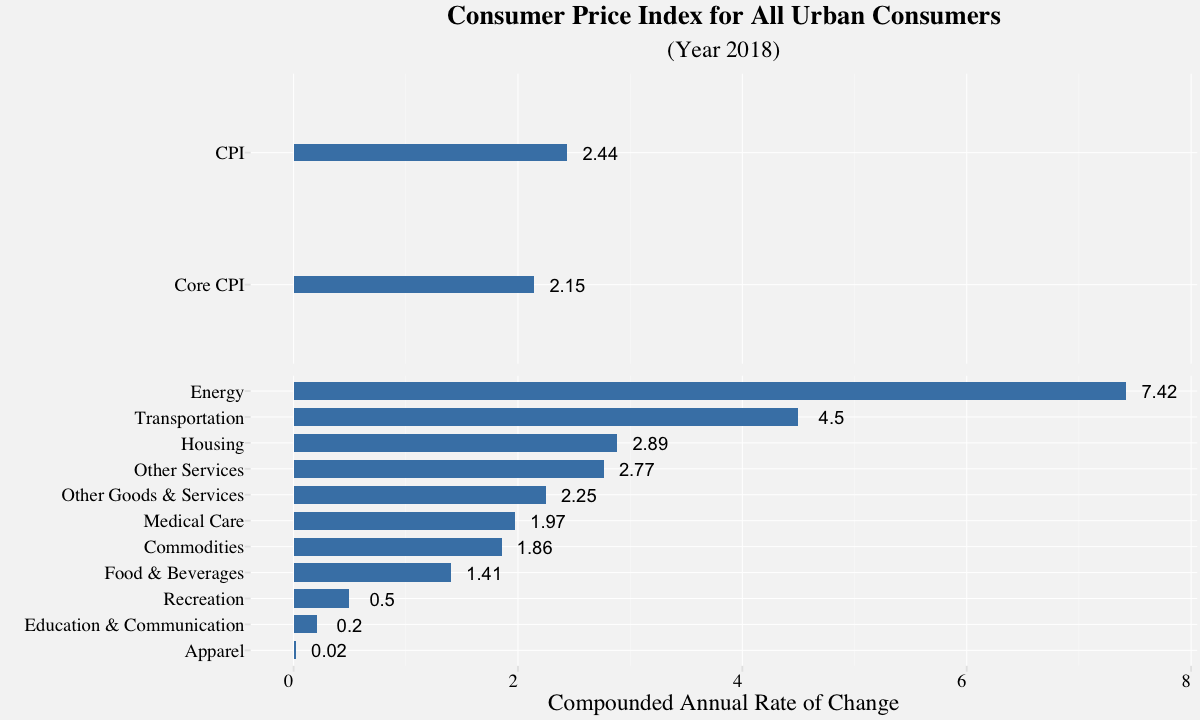

In [23]:
# Resizing the plot 
options(repr.plot.width=10, repr.plot.height=6)

# Subset of Consumer Price Index for All Urban Consumers for the year 2018
df_barplot_categories <- filter(cpi_annualavg,
                                Year==2018,
                                !Category %in% c('CPI','Core CPI')) %>%
                         mutate(plotorder = 1)

df_barplot_all <- filter(cpi_annualavg,
                         Year==2018,
                         Category %in% c('CPI','Core CPI')) %>% 
                  mutate(plotorder = 0)
                
# Plotting the bar plot
barplot_cpi <-
 ggplot(size=20) +
 geom_bar(data=df_barplot_categories, 
           aes(x=reorder(Category,AnnualAvgChange),
           y=AnnualAvgChange),
          stat="identity", 
          width= 0.7, 
          fill="steelblue") +
 geom_bar(data = df_barplot_all,
            aes(x = reorder(Category,plotorder),y=AnnualAvgChange),
            stat="identity", 
            width=0.125, 
            fill="steelblue") +
 geom_text(data=df_barplot_categories, 
           aes(x=reorder(Category,AnnualAvgChange),
               y=(AnnualAvgChange+ 0.25 * sign(AnnualAvgChange)),
           label =paste(" ",round(AnnualAvgChange,2))),
           hjust=0.5) +
 geom_text(data=df_barplot_all,
           aes(x = reorder(Category,plotorder),
               y= (AnnualAvgChange+ 0.25 *sign(AnnualAvgChange)),
           label =paste(" ",round(AnnualAvgChange,2))),
           hjust=0.5) +
 theme_pprabhu_grid() + 
 labs(title = "Consumer Price Index for All Urban Consumers",
      subtitle="(Year 2018)",
      x="",
      y="Compounded Annual Rate of Change") +
 coord_flip() +
 theme(plot.title = element_text(hjust = 0.5),
       plot.subtitle = element_text(hjust = 0.5,size=14),
       axis.text.x = element_text(angle=0,hjust = 1),
       strip.text.x = element_blank())  +
 facet_wrap(.~plotorder, nrow = 2,scales="free_y",shrink = FALSE)  
 

barplot_cpi

> ##### Diverging Bar Chart
    
    A diverging bar chart is a bar chart with a diverging aspect; i.e. It makes comparison of amounts from a 
    divergent line easy to visualize. This divergent line can represent zero, but it can also be used to simply 
    separate the two distinguishing members of the dataset based on the amount.
    
    In the plot depicted below, the divergent line is zero; Its quite easier to visualize which Categories saw a 
    positive rate of inflation vs negative.

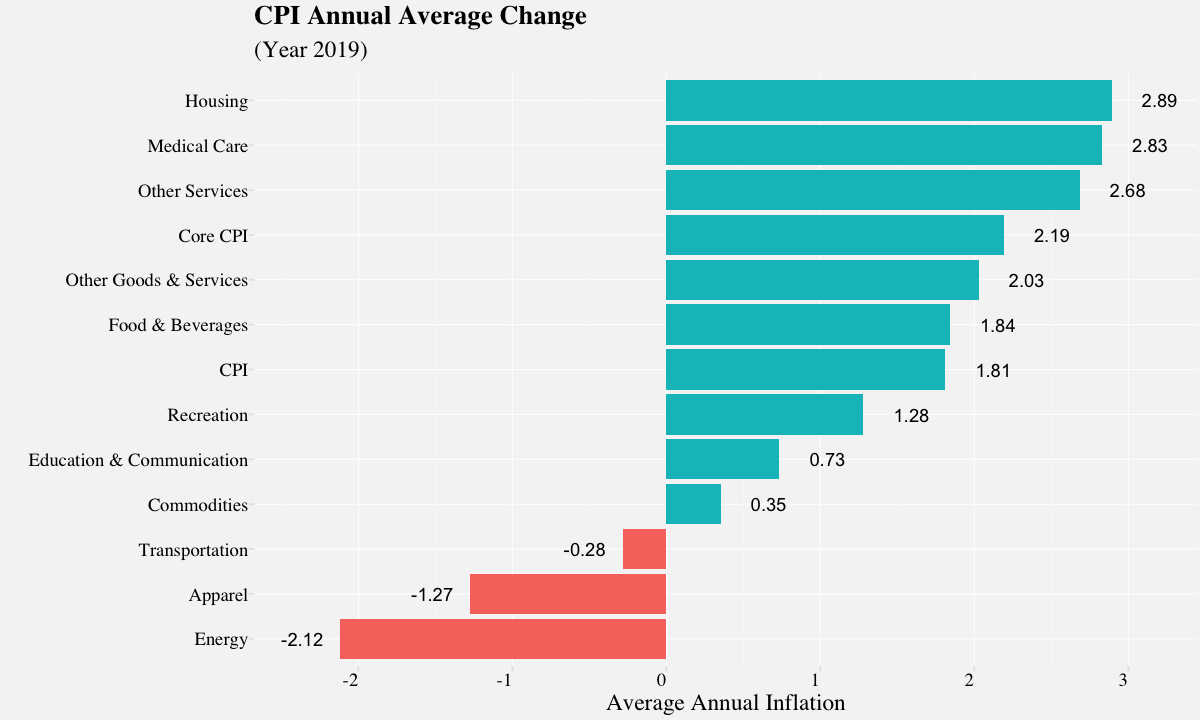

In [24]:
# Diverging bar plot 
cpi_annual <- cpi_annualavg %>% filter(Year==2019)

# Plotting the diverging bar plot
barplot_cpiannual <-
ggplot(cpi_annual, 
       aes(x=reorder(Category,AnnualAvgChange),
           y=AnnualAvgChange,
           fill = AnnualAvgChange>0))+
  geom_bar(stat="identity")+
  geom_text(aes(x=reorder(Category,AnnualAvgChange),
                y=(AnnualAvgChange+ 0.28 * sign(AnnualAvgChange)),
            label =paste(" ",round(AnnualAvgChange,2))),
            hjust=0.5) +
  labs(x="",
       y="Average Annual Inflation",
       title ="CPI Annual Average Change",
       subtitle="(Year 2019)") +
  theme_pprabhu_grid() +
  coord_flip() +
  theme(plot.subtitle = element_text(size=14),
        axis.text.x = element_text(angle = 0, hjust = 1)) +
  guides(fill = FALSE)
 
barplot_cpiannual

> ##### Stacked Bar Chart
    
    The stacked bar chart extends the standard bar chart from visualizing quantity of one categorical variable 
    to two. Each bar in a standard bar chart is divided into a number of sub-bars stacked end to end, each 
    one corresponding to a level of the second categorical variable. The main objective of a standard bar chart 
    is to compare numeric values between levels of a categorical variable. It also visualizes relative 
    decomposition of each of the categories.
    
    The stacked bar chart below depicts historical annual prices of precious metals. The two categorical 
    variables: Commodity and Year. The primary categorical variable is the Commodity. It also depicts the 
    relative decomposition of each of the commodities. For example, we can compare prices of 2018 vs 2019 in 
    the stacked bar chart and infer that although the prices of gold, platinum and silver were steady, the 
    palladium prices have risen considerably.

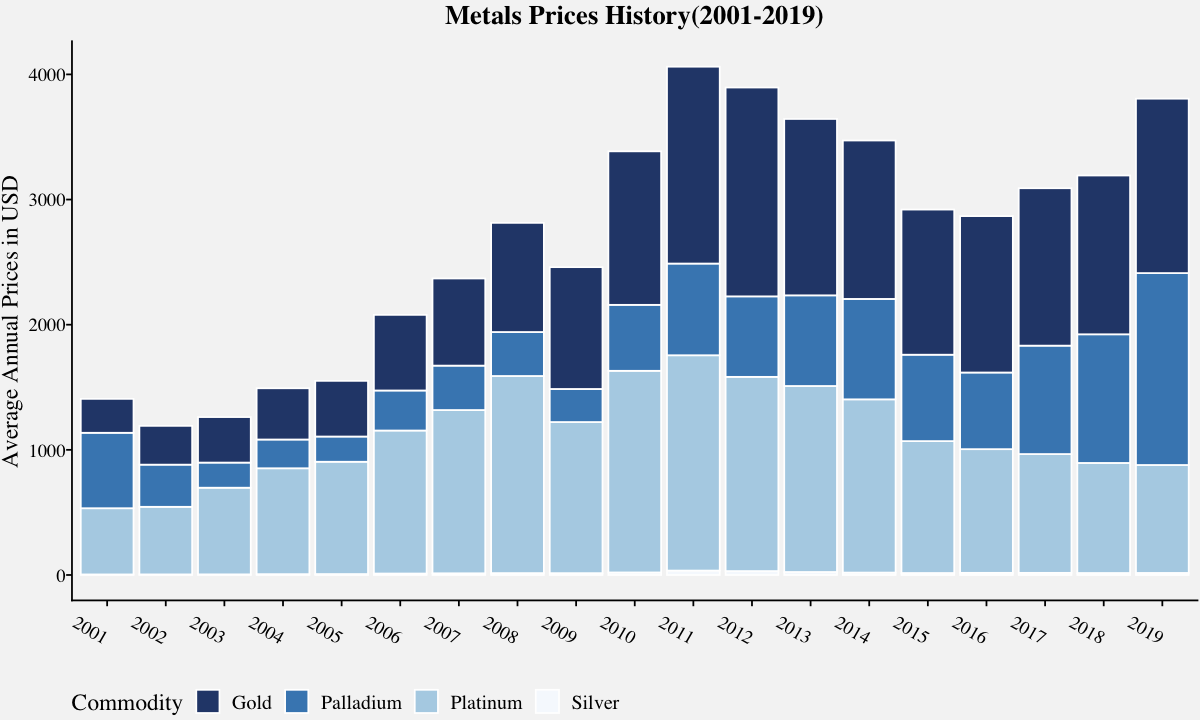

In [25]:
# Annual Metal prices (Includes Gold, Silver, Platinum and Palladium)
metals_stacked <-  filter(precious_metals,!is.na(USD),Year<2020,Year>2000) %>%
                   group_by(Year,Commodity) %>%
                   summarise(AnnualPrice = round(mean(USD),2))   

# Plot the stacked barplot using geom_bar()
metals_stackedplot <- 
ggplot(data=metals_stacked, 
       aes(x=factor(Year),
           y=AnnualPrice,
           fill=Commodity)) +
       geom_bar(stat="identity",
                color="white",
                alpha=0.9) +
       labs(x="",y="Average Annual Prices in USD") +
       ggtitle("Metals Prices History(2001-2019)") +
       theme_pprabhu() +
       theme(plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(hjust = 1)) +
       scale_fill_pprabhu(palette = "sseq",discrete=TRUE) 

metals_stackedplot

> ##### Grouped Bar Chart

    The grouped bar chart, also known as clustered bar graph, multi-set bar chart, or grouped column chart is a 
    variation of bar chart used when we need to visualize distribution of data points or making comparisons 
    across different categories of data.
    
    They are used when you want to do within-group and between-group comparisons in one single plot. For 
    example, in the plot below, we can check the price comparisons of base metals within each year as well as 
    over a period of time.

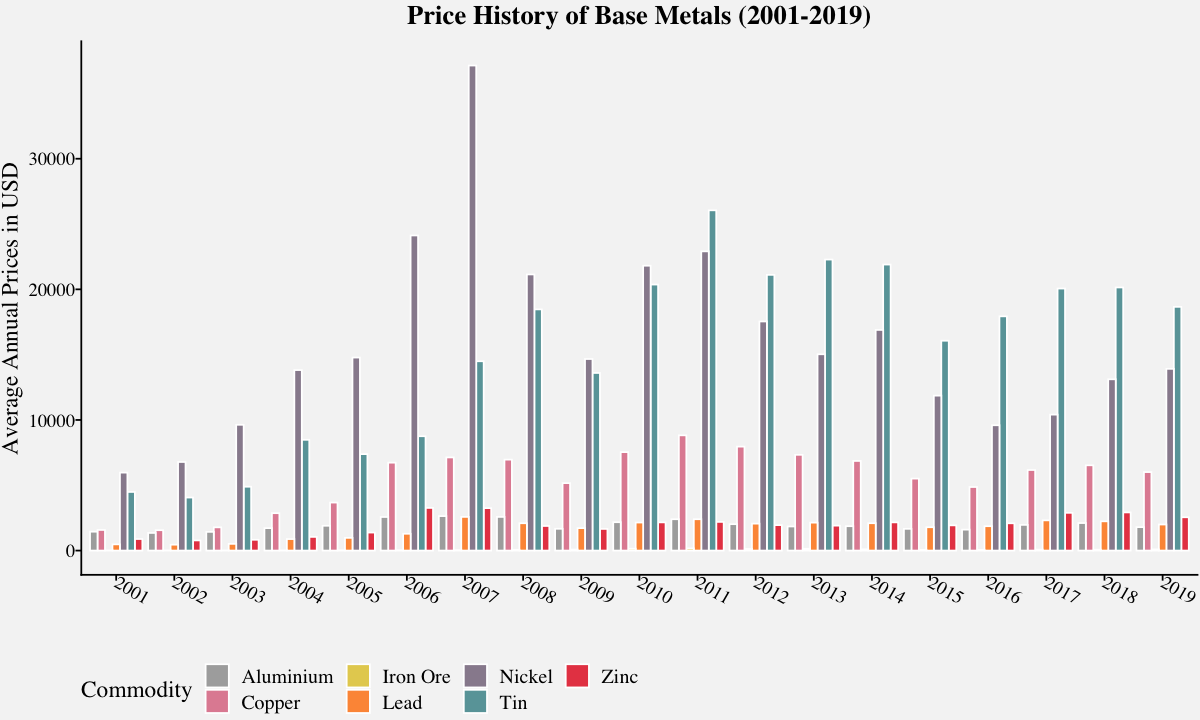

In [26]:
# Grouped Bar plot using geom_bar()
metals_grouped <-  filter(base_metals,!is.na(Value),Year<2020,Year>2000) %>%
                   group_by(Year,Commodity) %>%
                   summarise(AnnualPrice = round(mean(Value),2))   

metals_groupedplot <-
ggplot(data=metals_grouped, aes(x=factor(Year),
                                y=AnnualPrice,
                                fill=Commodity)) +
       geom_bar(stat="identity", 
                position=position_dodge(),
                alpha=0.8,
                color="white") +
       labs(x="",y="Average Annual Prices in USD") +
       ggtitle("Price History of Base Metals (2001-2019)") +
       scale_fill_pprabhu(palette = "qual") +
       theme_pprabhu() + 
       theme(plot.title = element_text(hjust = 0.5))

metals_groupedplot

> ##### Animated Bar Chart

    Animated bar charts are mostly used for visualization of trends over time. They provide a holistic data 
    story/insight in a concise and easy to understand chart, which makes them more popular in social media.

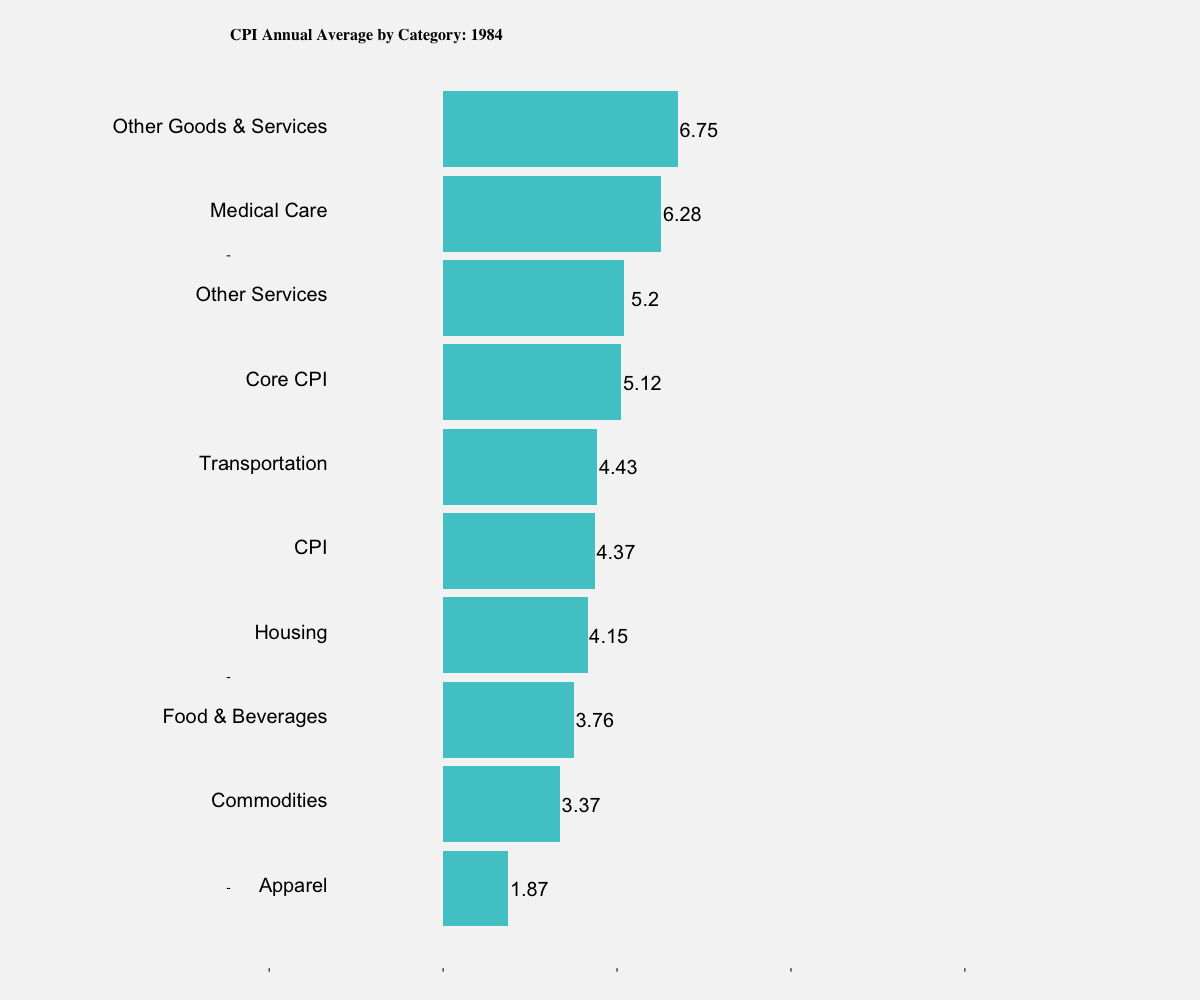

In [34]:
# Creating a Animated Bar Chart using ggplot and geom_tile
cpi_input_format <-
cpi_annualavg %>% 
group_by(Year)%>%      
mutate(rank = rank(-AnnualAvgChange),
       Value_rel = AnnualAvgChange/AnnualAvgChange[rank==1],
       Value_lbl = paste0(" ",round(AnnualAvgChange,2))) %>%
group_by(Category) %>% 
filter(rank <= 10)

# Creates images for every year
anim <- 
ggplot(cpi_input_format, 
       aes(rank, group = Category))+
  geom_tile(aes(y = AnnualAvgChange/2,
                height = AnnualAvgChange,
                fill = AnnualAvgChange>0,
                width = 0.9), alpha = 0.8) +
  geom_text(aes(y =sign(AnnualAvgChange)-4, 
                label = paste(Category, " ")), 
            vjust = 0.2, 
            hjust = 1,
            size=7) + 
  geom_text(aes(y=(AnnualAvgChange+ 0.45 * sign(AnnualAvgChange)),
            label =paste(" ",round(AnnualAvgChange,2))),
            hjust=0.5,
            size=7) +
  coord_flip(clip = "off", 
             expand = TRUE) +
  scale_x_reverse() +
  theme_pprabhu() +
  theme(legend.position="none",
        plot.margin = margin(1,4, 1, 8, "cm"),
        axis.line=element_blank(),
        axis.text.x=element_blank(),
        axis.text.y=element_blank(),
        axis.title.x=element_blank(),
        axis.title.y=element_blank()) +
  transition_states(Year, transition_length = 4, state_length = 1) +
  ease_aes('cubic-in-out') + # For a smoother look
  labs(title = 'CPI Annual Average by Category: {closest_state}')

# Stores the gif_image object in the working directory
animate(anim, nframes = 350, 
              fps = 15,
              width = 1200, 
              height = 1000, 
              renderer = gifski_renderer("gganim.gif"))

# This line inserts the image inline
IRdisplay::display_png(file = "gganim.gif")    

> #### Dot Plots

    Dot plots are one of the simplest way to visualize single numerical variable with a 
    modest number of observations. They are a great alternative to the bar chart and the 
    power of these plots becomes evident on refining and they can easily communicate 
    important aspects of your data to viewers. 
    
    In the example below, we have considered depicting Gold fixing price. Although this 
    is a simple and basic case of dot plot, they are capable of depicting lot more 
    information. In the latter example, we use dot plot to visualize the rate of 
    inflation from 2018 to 2019 and highlight the categories which underwent more than 
    20% rise in inflation rate.

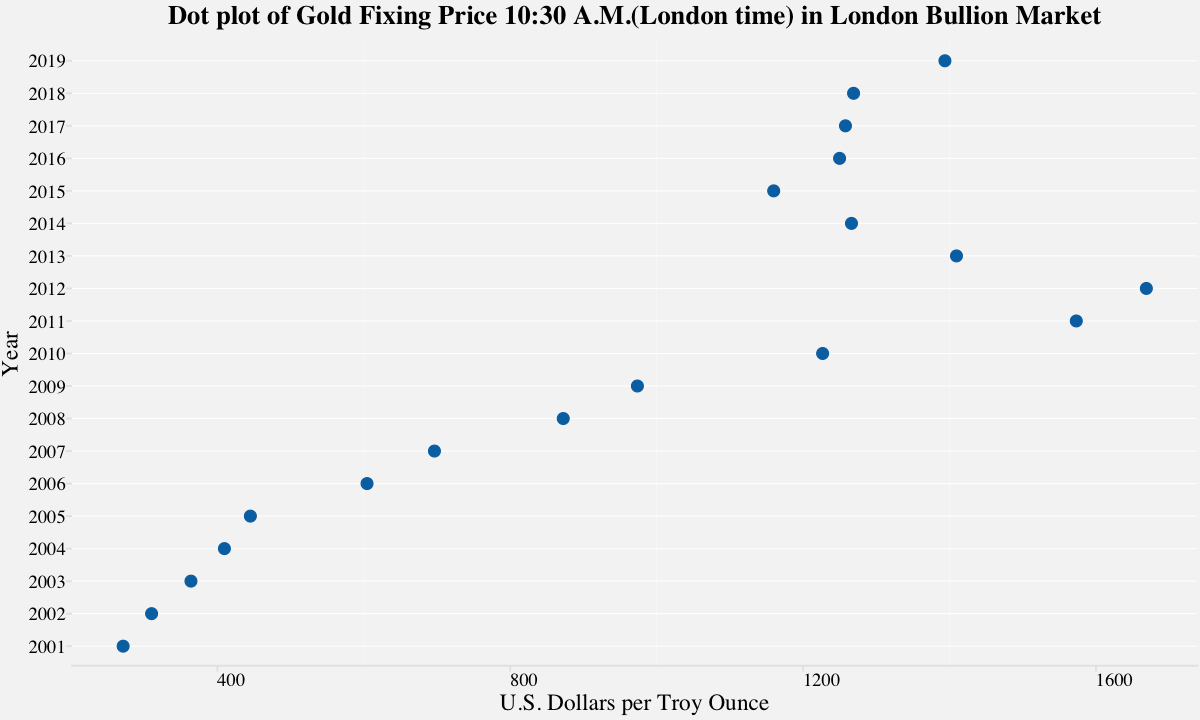

In [33]:
dotplot_data <- filter(precious_metals,Commodity=="Gold",!is.na(USD),
                       Year<2020,
                       Year>2000) %>%
                group_by(Year) %>%
                summarise(AnnualPrice = mean(USD))

# Dot plot using geom_point()
gold_dotplot <-
ggplot(data=dotplot_data, 
       aes(x = as.character(Year),y=AnnualPrice)) +
       geom_point(color = "#0072B2", size = 3) +
       labs(x="Year",y="U.S. Dollars per Troy Ounce") +
       ggtitle("Dot plot of Gold Fixing Price 10:30 A.M.(London time) in London Bullion Market") +
       theme_pprabhu_hgrid() + 
       theme(plot.title = element_text(hjust = 0.5),
             axis.text.x = element_text(angle=0)) + 
       coord_flip()       

gold_dotplot

> ##### Dot Plot

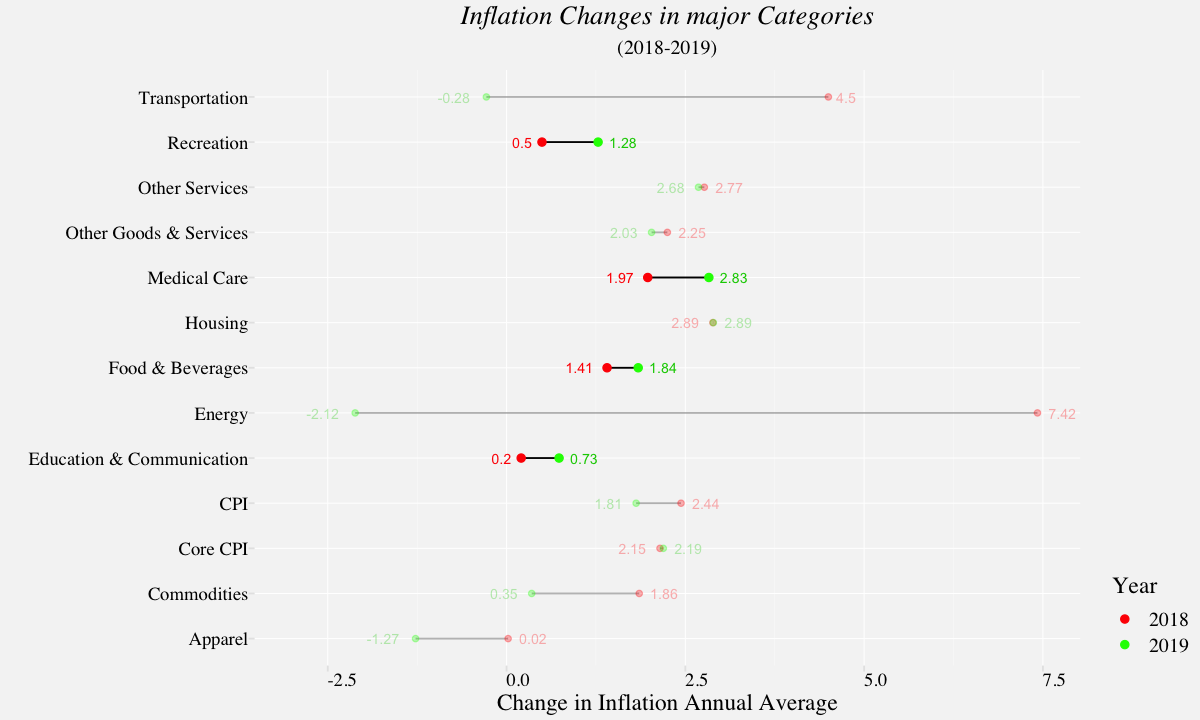

In [28]:
# Creating a data frame that identifies inflation changes over 20%
cpi_diff <- filter(cpi_annualavg,Year %in% c('2018','2019')) %>% 
            select(Year,Category,AnnualAvgChange) %>%
            spread(Year,AnnualAvgChange) %>%
            rename(Year_2019=3,Year_2018=2) %>%
            group_by(Category) %>%
            mutate(Diff = Year_2019 / Year_2018 - 1) %>% 
            arrange(desc(Diff)) %>%
            filter(Diff > .2)

# Creating a data frame for labels
labels_df <- filter(cpi_annualavg,Year %in% c('2018','2019')) %>% 
             select(Year,Category,AnnualAvgChange) %>%
             spread(Year,AnnualAvgChange) %>%
             rename(Year_2019=3,Year_2018=2) %>%
             group_by(Category) %>%
             mutate(left_label = min(Year_2018,Year_2019),
                    right_label = max(Year_2018,Year_2019)) %>%
             mutate(left_Year=if_else(left_label==Year_2018,"2018","2019"),
                    right_Year=if_else(right_label==Year_2018,"2018","2019"))

left_labels <- select(labels_df,"Category","left_label","left_Year")
right_labels <- select(labels_df,"Category","right_label","right_Year")

# Creating the main data frame for dot plot
df_cpi <- select(labels_df,"Category","Year_2018","Year_2019") %>% 
         gather(Year,AnnualAvgChange,-Category)

# Filtering main data frame to including Categories where the inflation changes exceeds 20%.
highlight <- filter(df_cpi,Category %in% cpi_diff$Category)

# Plots dot plot showing changes in CPI from 2018-2019 in all major categories
cpi_dualdotplot <-
ggplot(df_cpi,aes(x = df_cpi$AnnualAvgChange,y=df_cpi$Category)) +
        geom_line(aes(group = Category), alpha = .3) +
        geom_point(aes(color = Year), size = 1.5, alpha = .3) +
        geom_line(data = highlight,
                  aes(x = highlight$AnnualAvgChange,
                      y=highlight$Category,
                      group = Category)) +
        geom_point(data = highlight, 
                   aes(x = highlight$AnnualAvgChange,
                       y=highlight$Category,
                       color = Year), 
                   size = 2) +
        geom_text(data=left_labels,
                  aes(x= left_labels$left_label,
                      y= left_labels$Category,
                      label = round(left_labels$left_label, 2)),
                  color=left_labels$left_Year,
                  alpha= if_else(right_labels$Category %in% highlight$Category,1,0.3),
                  size = 3, 
                  hjust = 1.5) +
        geom_text(data=right_labels,
                  aes(x= right_labels$right_label,
                      y= right_labels$Category,
                      label = round(right_labels$right_label, 2)),
                  color=right_labels$right_Year,
                  size = 3,
                  alpha = if_else(right_labels$Category %in% highlight$Category,1,0.3),
                  hjust = -.4) +
        theme_pprabhu_grid() +
        scale_colour_manual(
          values = c("red","green"),
          breaks = c("Year_2018", "Year_2019"),
          labels = c("2018", "2019")) +
        labs(title="Inflation Changes in major Categories", 
             subtitle="(2018-2019)",
             x="Change in Inflation Annual Average",
             y="") +
        theme(legend.position="right",
              legend.justification = c("right", "bottom"),
              legend.margin = margin(5, 5, 5, 5),
              axis.text.x = element_text(angle=0),
              plot.title=element_text(hjust=0.5,face = "italic"),
              plot.subtitle=element_text(hjust=0.5)) +
        xlim(-3,7.5)

cpi_dualdotplot

> ##### Bubblechart

    A bubble chart uses areas of circle to represent the quantity of a numeric variable. It is a preferred when 
    we want to represent relationship between two or more numeric variables.
    
    In the following example, we represent the prices of base metals for the year 2019

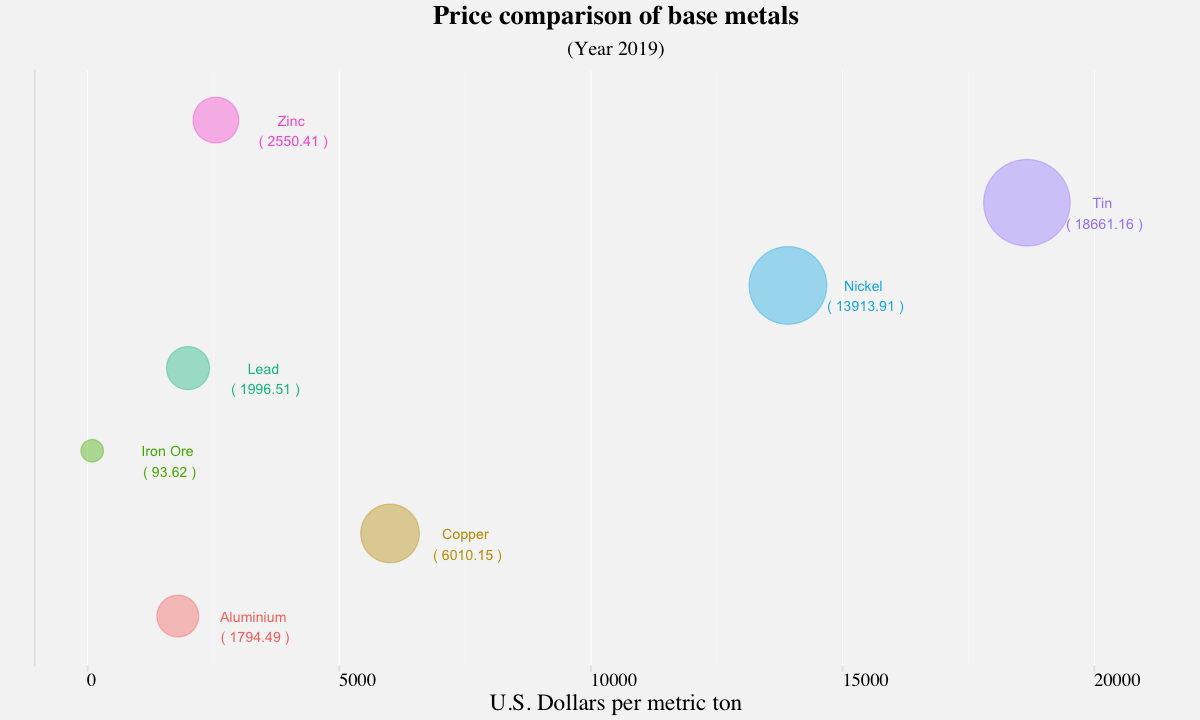

In [29]:
bubble_df <- base_metals %>% 
             filter(base_metals$Year==2019) %>% 
             group_by(Commodity) %>%
             summarise(AnnualPrice = round(mean(Value),2))   

ggplot(bubble_df,aes(x=AnnualPrice,
                     y=Commodity,
                     color = Commodity,
                     size=AnnualPrice)) +
    geom_point(aes(size=AnnualPrice),alpha=0.4) +
    scale_size(range = c(6, 24), 
               name="Annual Price") +
    geom_text(aes(x=AnnualPrice+1500,
                  y = Commodity,
                  label=paste("\n",Commodity,"\n","(",AnnualPrice,")")),
                  size=3) +
    labs(title="Price comparison of base metals", 
             subtitle="(Year 2019)",
             x="U.S. Dollars per metric ton",
             y="") +
    xlim(0,21000)+
    theme_pprabhu_vgrid() +
    guides(color=FALSE,size=FALSE) +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.text.x = element_text(angle=0),
          plot.title = element_text(hjust=0.5),
          plot.subtitle = element_text(hjust=0.5))

> ##### Heatmap

    A heatmap depicts values for a main variable of interest across two axis variables as a grid and uses color 
    coding to represent the quantity of values.
    
    In the below example, we generate a heatmap to depict historic monthly change in rate of inflation for major 
    categories.

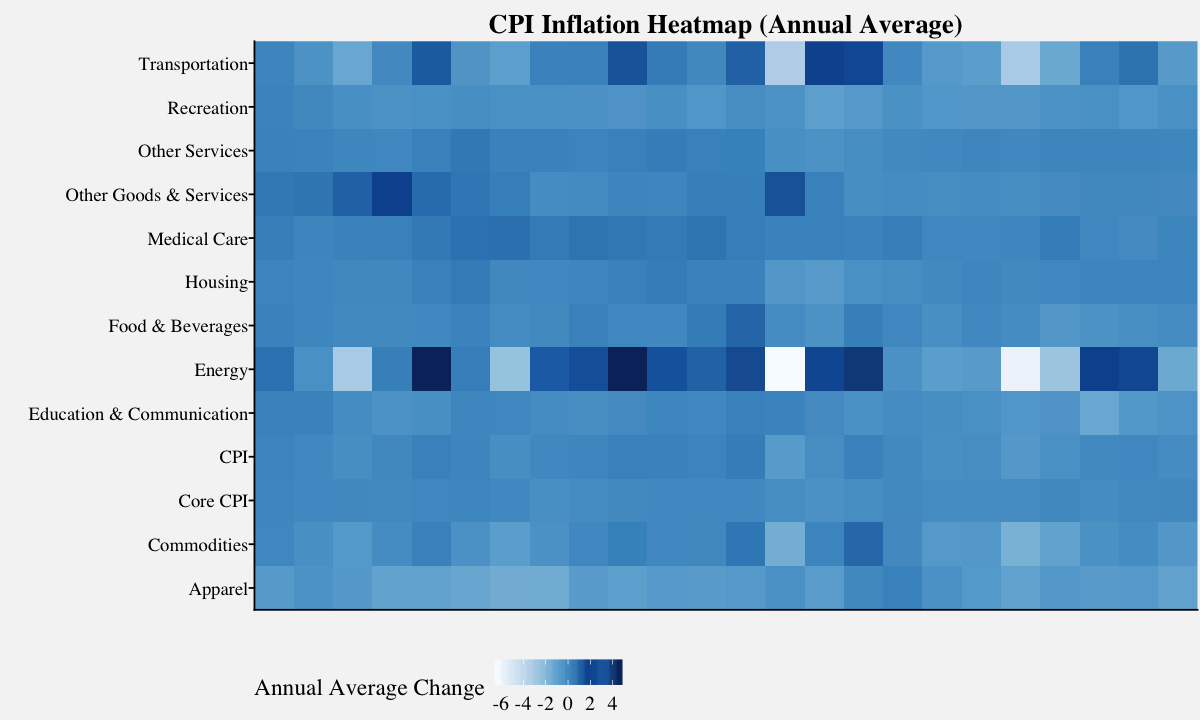

In [30]:
# Plots the heatmap on the CPI monthly Percent Change data
heatmap_plot <-
ggplot(data=filter(cpi_annualavg,Year>1995),
       aes(x=Year,
           y=Category,
           fill=scale(AnnualAvgChange))) +
       geom_tile(size=0.35,
                 aes(fill = scale(AnnualAvgChange))) +
       labs(x="",
            y="",
            fill = "Annual Average Change") +
       ggtitle("CPI Inflation Heatmap (Annual Average)") +
       scale_x_discrete(expand = c(0, 0)) +
       scale_y_discrete(expand = c(0, 0)) +
       theme_pprabhu() + 
       scale_fill_pprabhu(palette = "sseq",
                          discrete=FALSE,
                          reverse = FALSE) +
       theme(plot.title = element_text(hjust = 0.5,vjust=-0.5),
             axis.text.x = element_text(angle=0),
             legend.position="bottom", 
             legend.direction = "horizontal")


heatmap_plot